# Intro

## Features

### Popularity indicators
- stargazers_count -> number of stars
- forks_count
- subscribers_count
- downloads count for 2015 and 2016

### Features of projects
- size
- dependencies_count
- mainteiners_count
- contributors_count
- has_tests
- has_readme
- open_issues_count

In [1]:
# Helper function
from IPython.display import Markdown, display
def printmd(string):
    display(Markdown(string))

In [48]:
# Following code just fetches features from database and creates numpy arrays from it.
import sys
import os
import numpy as np
import psycopg2

wk_dir = os.path.dirname(os.path.realpath('__file__'))
sys.path.append(
        os.path.abspath(os.path.join(wk_dir, '..')))

from source.helpers.db import execute, fetch

result = fetch((
"SELECT stargazers_count, forks_count,"
        "open_issues_count, size, subscribers_count,"
        "dependencies_count, mainteiners_count,"
        "contributors_count, has_tests, has_readme,"
        "total_downloads.downloads, average_downloads.avg,"
        "last_month_downloads.downloads,"
        "last_week_downloads.downloads "
"FROM repos AS r "
"INNER JOIN average_downloads ON r.id = average_downloads.repo_id "
"INNER JOIN total_downloads ON r.id = total_downloads.repo_id "
"INNER JOIN last_month_downloads ON r.id = last_month_downloads.repo_id "
"INNER JOIN last_week_downloads ON r.id = last_week_downloads.repo_id "
"WHERE has_readme is not Null "
"ORDER BY RANDOM();"
))


X_tmp = []
Y_tmp = []
for r in result:
    y = [r[0], r[1], r[4], r[10], r[11], r[12], r[13]] # contains stargazers_count, forks_count, subscribers_count
    x = [r[2], r[3], r[5], r[6], r[7], int(r[8]), int(r[9])] 
    # contains open_issues_count, size, dependencies_count, mainteiners_count, 
    # contributors_count, has_tests, has_readme 
    X_tmp.append(x)
    Y_tmp.append(y)

X_labels = ["open_issues_count", "size", "dependencies_count", 
            "mainteiners_count", "contributors_count", "has_tests", "has_readme"]
Y_labels = ["stars", "forks", "subscribers", "downloads", 
            "avg_per_month", "last_month_downloads", "last_week_downloads"]
X = np.array(X_tmp, dtype=np.float64)
Y = np.array(Y_tmp, dtype=np.float64)

In [1]:
# helper functions
# indexes

OPEN_ISSUES_COUNT = 0
SIZE = 1
DEPENDENCIES_COUNT = 2
MAINTAINERS_COUNT = 3
CONTRIBUTORS_COUNT = 4
HAS_TESTS = 5
HAS_README = 6

STARS = 0
FORKS = 1
SUBSCRIBERS = 2
TOTAL_DOWNLOADS = 3
AVERAGE_PER_MONTH_DOWNLOADS = 4
LAST_MONTH_DOWNLOADS = 5
LAST_WEEK_DOWNLOADS = 6

In [4]:
# here we take a look at how many packages have tests and how many of them have readme file

column_sum = np.sum(X, axis=0)
has_tests_total = column_sum[HAS_TESTS]
has_readme_total = column_sum[HAS_README]
total = X.shape[0]
print("Packages that have tests: {} / {}".format(has_tests_total, total))
print("Packages that have readme file: {} / {}".format(has_readme_total, total))


Packages that have tests: 106661.0 / 139488
Packages that have readme file: 126201.0 / 139488


In [5]:
import pandas as pd

pd.set_option('display.float_format', lambda x: '%.0f' % x)
dataframe = pd.DataFrame.from_records(data=np.concatenate([X, Y], axis=1), columns=X_labels + Y_labels)
file_handle = open('data.csv', 'w')
dataframe.to_csv(path_or_buf=file_handle)
dataframe.describe()

,open_issues_count,size,dependencies_count,mainteiners_count,contributors_count,has_tests,has_readme,stars,forks,subscribers,downloads,avg_per_month,last_month_downloads,last_week_downloads
count,139488,139488,139488,139488,139488,139488,139488,139488,139488,139488,139488,139488,139488,139488
mean,2,974,3,1,0,1,1,44,7,5,397430,20478,36701,9966
std,19,10327,4,1,5,0,0,591,155,46,6422534,323927,556648,152214
min,0,0,0,0,0,0,0,0,0,0,31,10,3,1
25%,0,20,0,1,0,1,1,0,0,1,353,32,17,4
50%,0,128,1,1,0,1,1,1,0,1,911,73,42,10
75%,1,220,3,1,0,1,1,5,1,2,2806,203,162,40
max,2417,1413899,130,66,587,1,1,98280,43605,6318,396933770,19846688,36851932,11355842


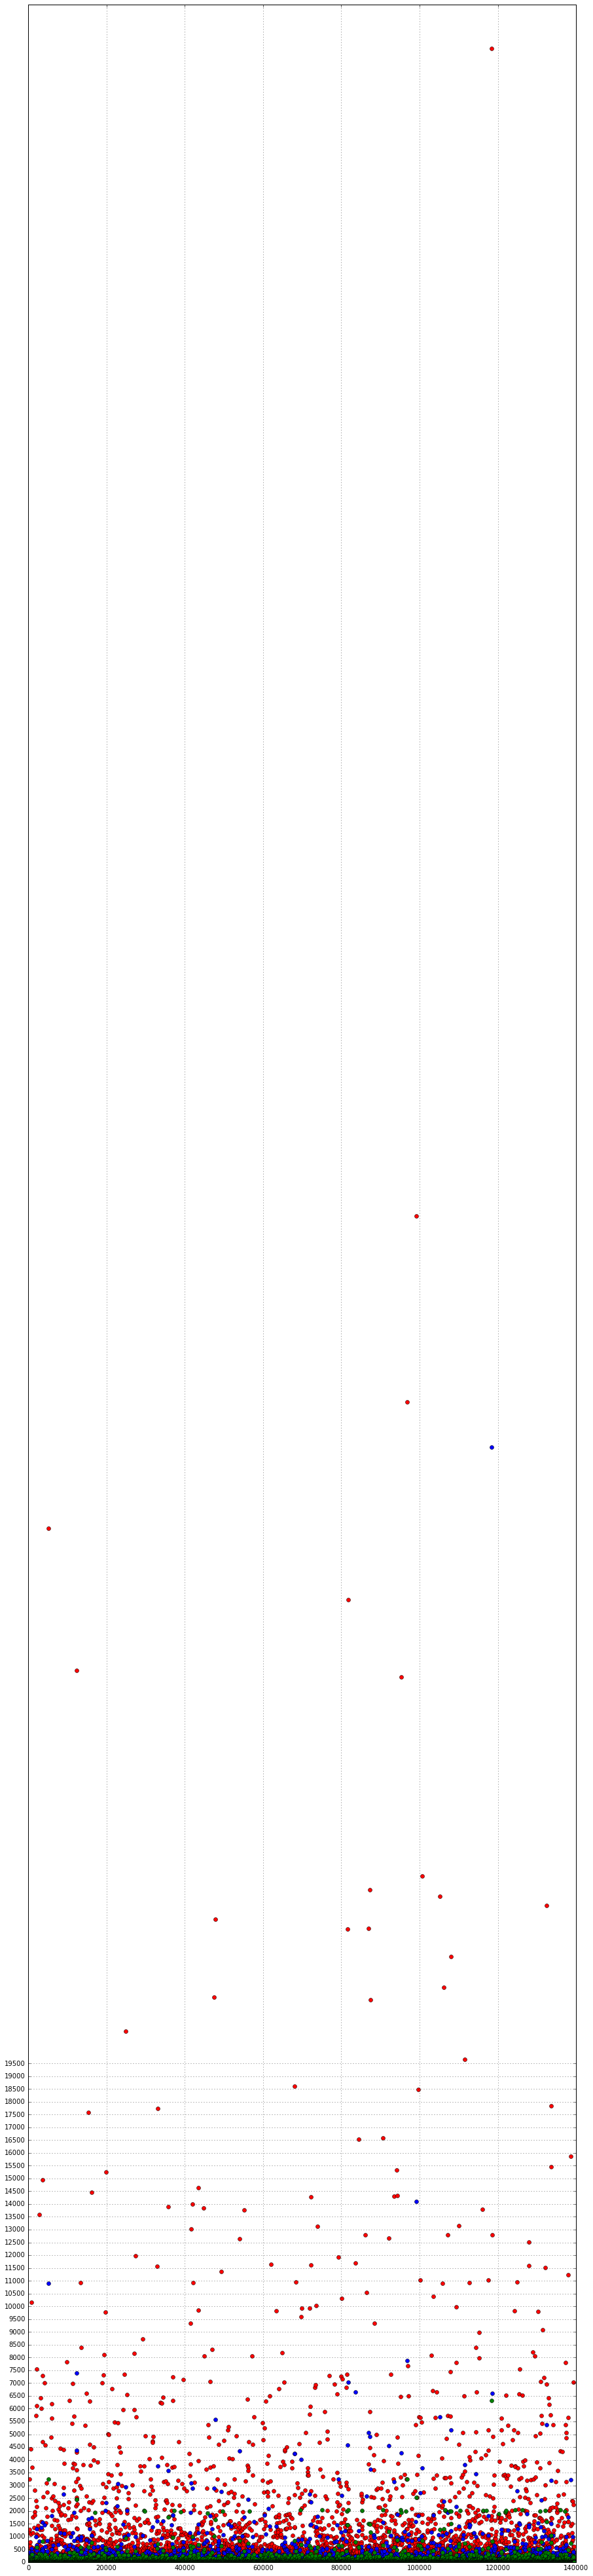

In [6]:
# the following plot helps to see distribution of value
# we made the graph very high so the distribution can be viewed better

%matplotlib inline

import matplotlib.pyplot as plt

fig = plt.figure(figsize=(15, 70))
plt.plot(Y[:, STARS], 'ro')
plt.plot(Y[:, FORKS], 'bo')
plt.plot(Y[:, SUBSCRIBERS], 'go')
plt.yticks( np.arange(0, 20000, 500.0))
plt.grid()
plt.show()

In the graph above we can see that red dots (number of stars) stand out and differentiate the repos the most. Even though most of the repos have very low stars count.

In [7]:
# predefine helper functions to calculate mea, media, mode, quartiles, variance 
# and wrapper function that prints all of them
from scipy import stats

def print_mean(X):
    print("Mean: ", np.mean(X))

        
def print_median(X):
    print("Median: ", np.median(X))
    
def print_mode(X):
    print("Mode: ", stats.mode(X))

def print_quartiles(X):
    print("Q1: ", np.percentile(X, 25))
    print("Q2: ", np.percentile(X, 50))
    print("Q3: ", np.percentile(X, 75))
    
def print_variance(X):
    print("Variance: ", np.var(X))

def print_analysis(X):
    print_mean(X)
    print_median(X)
    print_mode(X)
    print_quartiles(X)
    print_variance(X)

In [8]:
# analyzing popularity features

print("Stars")
print_analysis(Y[:, STARS])
print("===========================")

print("Forks")
print_analysis(Y[:, FORKS])
print("===========================")

print("Subribers")
print_analysis(Y[:, SUBSCRIBERS])
print("===========================")

print("Downloads")
print_analysis(Y[:, TOTAL_DOWNLOADS])
print("===========================")

print("Avg downloads")
print_analysis(Y[:, AVERAGE_PER_MONTH_DOWNLOADS])

print("Last month downloads")
print_analysis(Y[:, LAST_MONTH_DOWNLOADS])

print("Last week downloads")
print_analysis(Y[:, LAST_WEEK_DOWNLOADS])







Stars
Mean:  43.7087563088
Median:  1.0
Mode:  ModeResult(mode=array([ 0.]), count=array([59119]))
Q1:  0.0
Q2:  1.0
Q3:  5.0
Variance:  348758.513816
Forks
Mean:  7.44230328057
Median:  0.0
Mode:  ModeResult(mode=array([ 0.]), count=array([87036]))
Q1:  0.0
Q2:  0.0
Q3:  1.0
Variance:  24103.1646712
Subribers
Mean:  5.38563173893
Median:  1.0
Mode:  ModeResult(mode=array([ 1.]), count=array([79876]))
Q1:  1.0
Q2:  1.0
Q3:  2.0
Variance:  2088.35641405
Downloads
Mean:  397430.198956
Median:  911.0
Mode:  ModeResult(mode=array([ 266.]), count=array([199]))
Q1:  353.0
Q2:  911.0
Q3:  2806.0
Variance:  4.12486427949e+13
Avg downloads
Mean:  20477.609398
Median:  73.0
Mode:  ModeResult(mode=array([ 15.]), count=array([378]))
Q1:  32.45
Q2:  73.0
Q3:  202.551388889
Variance:  104928159969.0
Last month downloads
Mean:  36701.0591735
Median:  42.0
Mode:  ModeResult(mode=array([ 8.]), count=array([4325]))
Q1:  17.0
Q2:  42.0
Q3:  162.25
Variance:  309854371658.0
Last week downloads
Mean:  9966

In [9]:
# analyzing project features

print("Open issues count")
print_analysis(X[:, OPEN_ISSUES_COUNT])
print("===========================")

print("Size")
print_analysis(X[:, SIZE])
print("===========================")

print("Dependencies")
print_analysis(X[:, DEPENDENCIES_COUNT])
print("===========================")

print("Mainteiners")
print_analysis(X[:, MAINTAINERS_COUNT])
print("===========================")

print("Contributors")
print_analysis(X[:, CONTRIBUTORS_COUNT])
print("===========================")

Open issues count
Mean:  2.05925957788
Median:  0.0
Mode:  ModeResult(mode=array([ 0.]), count=array([100342]))
Q1:  0.0
Q2:  0.0
Q3:  1.0
Variance:  348.018698098
Size
Mean:  973.528489906
Median:  128.0
Mode:  ModeResult(mode=array([ 3.]), count=array([2730]))
Q1:  20.0
Q2:  128.0
Q3:  220.0
Variance:  106650894.0
Dependencies
Mean:  2.67645245469
Median:  1.0
Mode:  ModeResult(mode=array([ 0.]), count=array([43683]))
Q1:  0.0
Q2:  1.0
Q3:  3.0
Variance:  19.8473917164
Mainteiners
Mean:  1.1758932668
Median:  1.0
Mode:  ModeResult(mode=array([ 1.]), count=array([127768]))
Q1:  1.0
Q2:  1.0
Q3:  1.0
Variance:  1.3979658372
Contributors
Mean:  0.252093370039
Median:  0.0
Mode:  ModeResult(mode=array([ 0.]), count=array([129569]))
Q1:  0.0
Q2:  0.0
Q3:  0.0
Variance:  28.5680301441


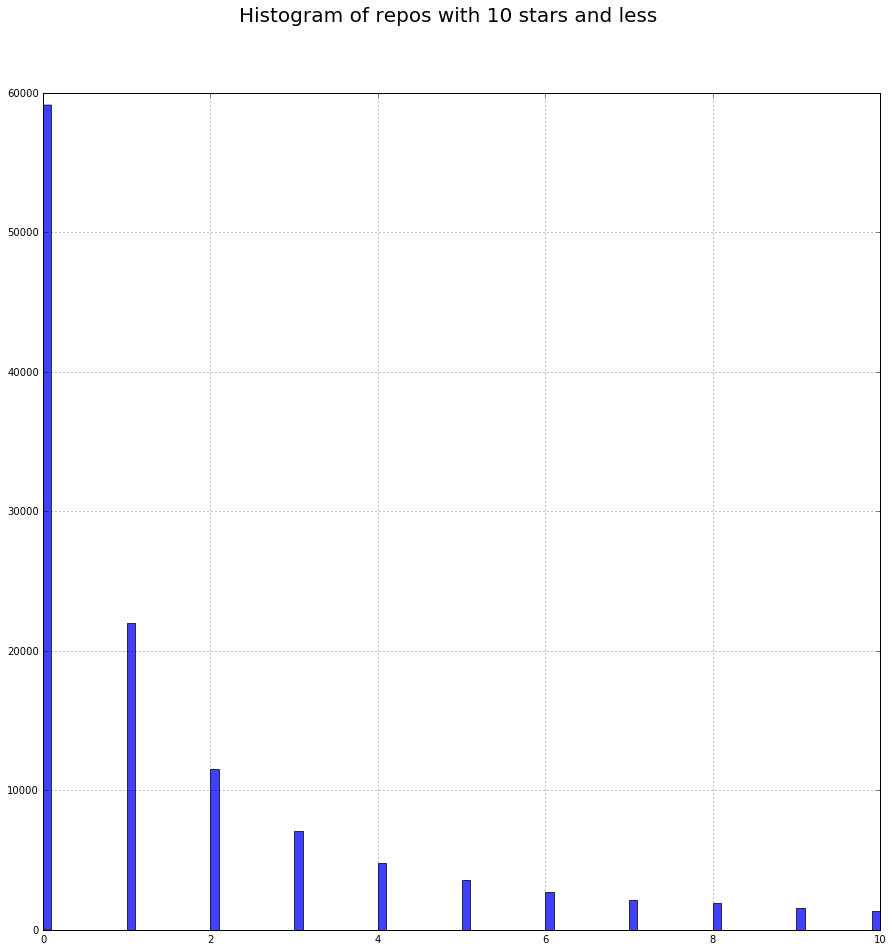

In [10]:

import matplotlib.mlab as mlab

mu, sigma = 100, 15
# the histogram of the data
plt.figure(figsize=(15, 15)).suptitle('Histogram of repos with 10 stars and less', size=20)
n, bins, patches = plt.hist(Y[:, 0], 100, range=(0, 10), normed=False, alpha=0.75)
# add a 'best fit' line
y = mlab.normpdf( bins, mu, sigma)
l = plt.plot(bins, y, 'r--', linewidth=1)

plt.grid(True)

plt.show()

This plot shows histogram for repositories with 10 and less stars, most of the repositories are in this range and overwhelming majory has 0 stars.

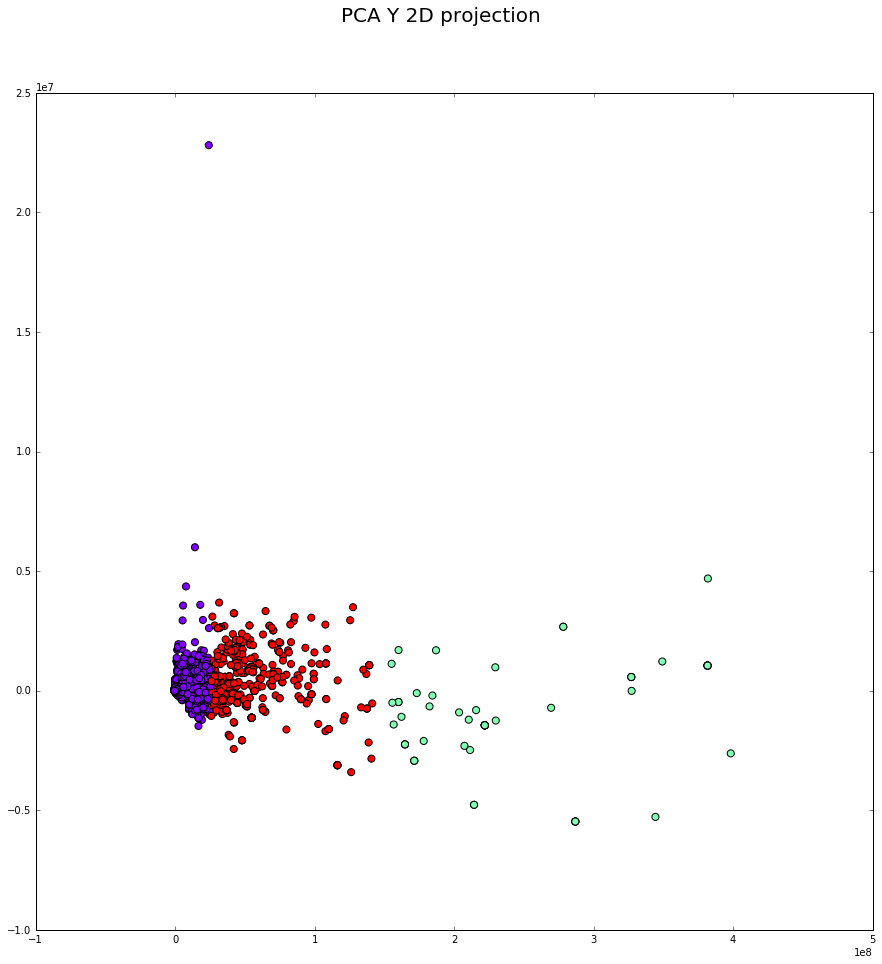

In [11]:
# We cluster popularity features into 3 groups
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
pca.fit(Y)
transformed = pca.transform(Y)

est = KMeans(3)
est.fit(transformed)

y_kmeans = est.predict(transformed)
plt.figure(figsize=(15, 15)).suptitle('PCA Y 2D projection', size=20)
plt.scatter(transformed[:, 0], transformed[:, 1], c=y_kmeans, s=50, cmap='rainbow');

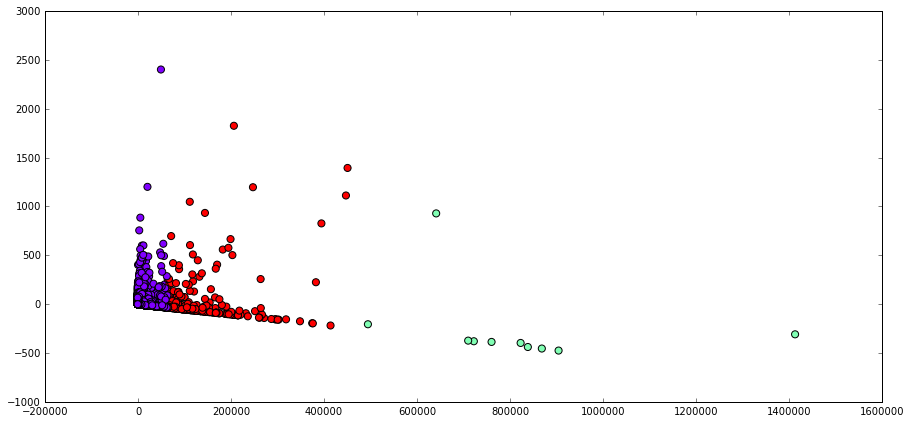

In [12]:
# We cluster project features into 3 groups
est = KMeans(3)  # 4 clusters
est.fit(X)

x_kmeans = est.predict(X)


pca = PCA(n_components=2)
pca.fit(X)
transformed = pca.transform(X)

plt.figure(figsize=(15, 7))
plt.scatter(transformed[:, 0], transformed[:, 1], c=x_kmeans, s=50, cmap='rainbow');

# Correlations

In [13]:
# We look for correlations between project features.
from sklearn import preprocessing
from scipy.stats.stats import pearsonr   

for i in range(0, Y.shape[1]):
    for j in range(i + 1, Y.shape[1]):
        a = preprocessing.scale(Y[:, i])
        b = preprocessing.scale(Y[:, j])
        print("{} <--> {}".format(Y_labels[i], Y_labels[j]))
        print(pearsonr(a,b))

stars <--> forks
(0.85659083712922535, 0.0)
stars <--> subscribers
(0.70085415537388329, 0.0)
stars <--> downloads
(0.079901002977939298, 2.7328197621145562e-196)
stars <--> avg_per_month
(0.079292588963568986, 2.4676765017327772e-193)
stars <--> last_month_downloads
(0.080599200396343718, 1.0390330166133018e-199)
stars <--> last_week_downloads
(0.079939812390229764, 1.7672586881864447e-196)
forks <--> subscribers
(0.66411078543295643, 0.0)
forks <--> downloads
(0.039670089939830677, 1.0602941292927081e-49)
forks <--> avg_per_month
(0.039316579822538507, 7.5222423508585004e-49)
forks <--> last_month_downloads
(0.040209388860539326, 5.1607341300634912e-51)
forks <--> last_week_downloads
(0.039959065376139642, 2.1096929580572389e-50)
subscribers <--> downloads
(0.040602832933675552, 5.5450131106646317e-52)
subscribers <--> avg_per_month
(0.040291408733104578, 3.2472933221565553e-51)
subscribers <--> last_month_downloads
(0.041127520037869368, 2.7372941049567398e-53)
subscribers <--> last

Stars, forks and stars, subscribers correlate quite well. However to my suprise stars and number of downloads does not correlate at all.

In [14]:

for i in range(0, X.shape[1]):
    for j in range(i + 1, X.shape[1]):
        a = preprocessing.scale(X[:, i])
        b = preprocessing.scale(X[:, j])
        print("{} <--> {}".format(X_labels[i], X_labels[j]))
        print(pearsonr(a,b))
        print("\n")


open_issues_count <--> size
(0.28951719303637502, 0.0)


open_issues_count <--> dependencies_count
(0.10041511862186236, 2.3305622587345531e-309)


open_issues_count <--> mainteiners_count
(0.068114686607685673, 4.3610595314369811e-143)


open_issues_count <--> contributors_count
(0.10029914477169116, 1.2027920011335988e-308)


open_issues_count <--> has_tests
(2.3838002013825732e-05, 0.99289656016123962)


open_issues_count <--> has_readme
(0.0086519639155279802, 0.0012319620082474727)


size <--> dependencies_count
(0.051001669608274632, 5.3877737561692695e-81)


size <--> mainteiners_count
(0.030674988015713209, 2.1166277379850026e-30)


size <--> contributors_count
(0.014569276433726233, 5.280804154342371e-08)


size <--> has_tests
(-0.025664705523587506, 9.0884859953620564e-22)


size <--> has_readme
(0.00034610216943446157, 0.89715081089534265)


dependencies_count <--> mainteiners_count
(0.10271890643513669, 9.8813129168249309e-324)


dependencies_count <--> contributors_count
(

In [15]:
# We look for correlations between project features and popularity indicators. 
for i in range(0, X.shape[1]):
    for j in range(0, Y.shape[1]):
        a = preprocessing.scale(X[:, i])
        b = preprocessing.scale(Y[:, j])
        print("{} <--> {}".format(X_labels[i], Y_labels[j]))
        print(pearsonr(a,b))


open_issues_count <--> stars
(0.49055184964353171, 0.0)
open_issues_count <--> forks
(0.39794902022024831, 0.0)
open_issues_count <--> subscribers
(0.38518932773401948, 0.0)
open_issues_count <--> downloads
(0.036340176563242961, 5.503250173916908e-42)
open_issues_count <--> avg_per_month
(0.03602677083400762, 2.7052194078206921e-41)
open_issues_count <--> last_month_downloads
(0.034509101110447069, 4.979281381060207e-38)
open_issues_count <--> last_week_downloads
(0.033813353248965679, 1.4040502553625883e-36)
size <--> stars
(0.168826058504397, 0.0)
size <--> forks
(0.16388061616973124, 0.0)
size <--> subscribers
(0.16099615730836464, 0.0)
size <--> downloads
(0.0089556196614118955, 0.00082344835852770834)
size <--> avg_per_month
(0.008782146435221367, 0.0010380781879758608)
size <--> last_month_downloads
(0.0090214051094425207, 0.00075342661650461913)
size <--> last_week_downloads
(0.0088368322454787946, 0.0009653915853130822)
dependencies_count <--> stars
(0.06010956465319494, 8.178

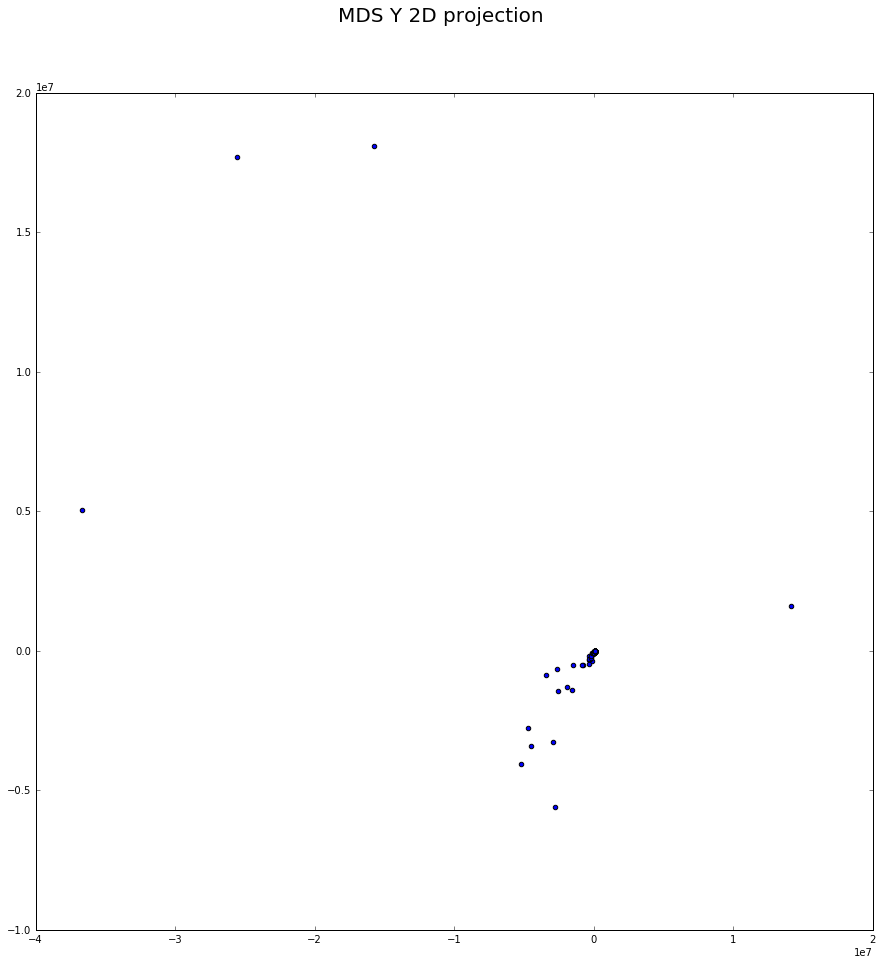

In [16]:
from sklearn.manifold import MDS

mds = MDS(n_components=2, metric=True, dissimilarity='euclidean', random_state=3)
Y_mds = mds.fit_transform(Y[:1000])

plt.figure(figsize=(15, 15)).suptitle('MDS Y 2D projection', size=20)
plt.subplot(111)
plt.scatter(Y_mds[0:,0], Y_mds[0:,1])

plt.show()

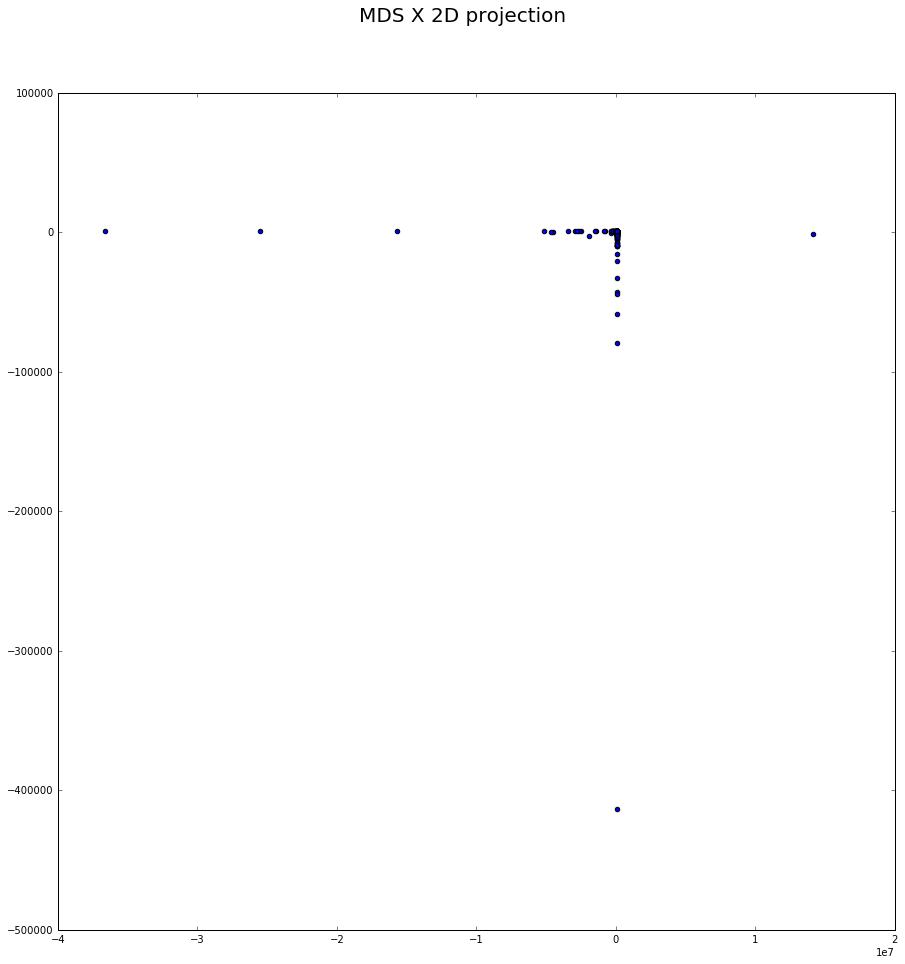

In [17]:
mds = MDS(n_components=2, metric=True, dissimilarity='euclidean', random_state=3)
X_mds = mds.fit_transform(X[:1000])

plt.figure(figsize=(15, 15)).suptitle('MDS X 2D projection', size=20)
plt.subplot(111)

plt.scatter(Y_mds[0:,0], X_mds[0:,1])

plt.show()

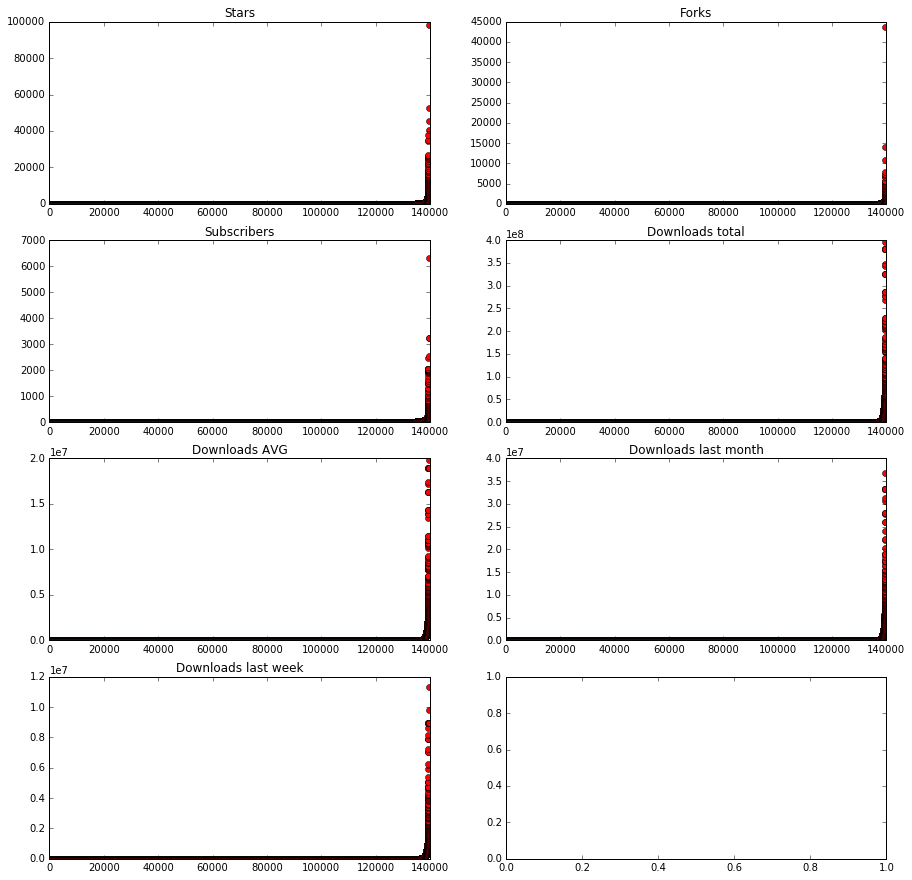

In [18]:

fig, axes = plt.subplots(nrows=4, ncols=2, figsize=(15, 15))




axes[0, 0].plot(np.sort(Y[:, STARS]), 'ro')
axes[0, 0].set_title('Stars')

axes[0, 1].plot(np.sort(Y[:, FORKS]), 'ro')
axes[0, 1].set_title('Forks')

axes[1, 0].plot(np.sort(Y[:, SUBSCRIBERS]), 'ro')
axes[1, 0].set_title('Subscribers')

axes[1, 1].plot(np.sort(Y[:, TOTAL_DOWNLOADS]), 'ro')
axes[1, 1].set_title('Downloads total')

axes[2, 0].plot(np.sort(Y[:, AVERAGE_PER_MONTH_DOWNLOADS]), 'ro')
axes[2, 0].set_title('Downloads AVG')

axes[2, 1].plot(np.sort(Y[:, LAST_MONTH_DOWNLOADS]), 'ro')
axes[2, 1].set_title('Downloads last month')

axes[3, 0].plot(np.sort(Y[:, LAST_WEEK_DOWNLOADS]), 'ro')
axes[3, 0].set_title('Downloads last week')


plt.show()




Distribution of popularity indicators is very imbalanced, either the package is not popular at all or it grows really fast.

# Predictions - regresson

First we will take number of downloads as feature we wish to predict and use various sklearn built in models.

In [19]:
from sklearn.cross_validation import train_test_split
from sklearn.metrics import mean_squared_error, explained_variance_score, median_absolute_error

X_scaled = preprocessing.scale(X)

X_train, X_test, y_train, y_test = train_test_split(X_scaled, Y[:, TOTAL_DOWNLOADS])
def test_model(model):    
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    print("Mean: ", mean_squared_error(y_test, y_pred))
    print("Variance", explained_variance_score(y_test, y_pred))
    print("Median", median_absolute_error(y_test, y_pred))
    
    

In [20]:
from sklearn.ensemble import RandomForestRegressor

# Random Forest

randomForestRegressor = RandomForestRegressor(1)
test_model(randomForestRegressor)



Mean:  9.22144999438e+13
Variance -0.779310449757
Median 3511.0


In [21]:
from sklearn import linear_model
# Linear regression
clf = linear_model.LinearRegression()
test_model(randomForestRegressor)

Mean:  8.7639047729e+13
Variance -0.691076851793
Median 3463.0


In [22]:
# Ridge regression
clf = linear_model.Ridge (alpha = .5)
test_model(randomForestRegressor)

Mean:  9.29163632429e+13
Variance -0.792888645391
Median 3332.6426799


In [23]:
clf = linear_model.Lasso(alpha = 0.1)
test_model(randomForestRegressor)

Mean:  7.96041700785e+13
Variance -0.536033699421
Median 3515.90909091


Results have low mean square error because most of the packages have low total downloads. However median error is high.

# Looking at most popular packages

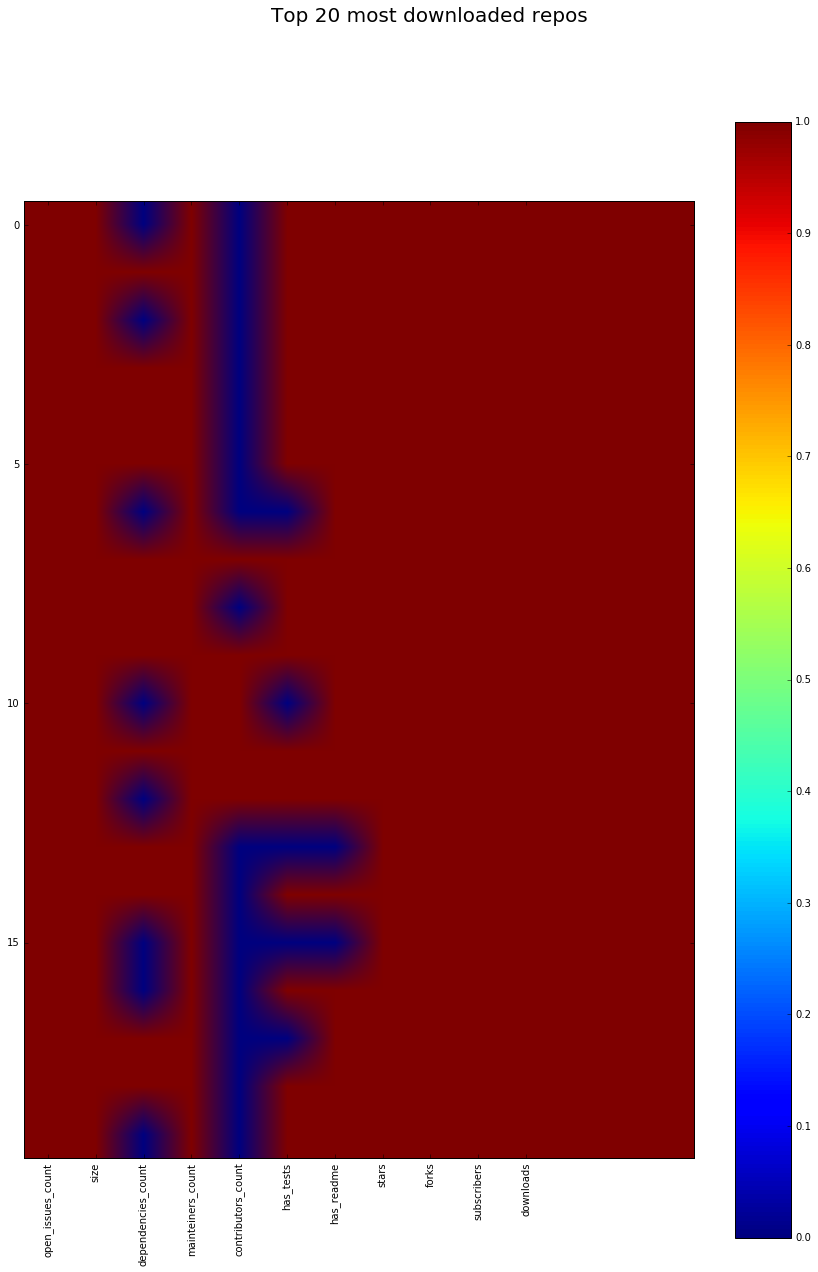

In [24]:
M_labels = X_labels + Y_labels
M = np.concatenate([X, Y], axis=1)
np.set_printoptions(suppress=True, linewidth=150)

M = M[M[:,7].argsort()]
n = M.shape[0]
offset = 0
plt.figure(figsize=(15, 20)).suptitle('Top 20 most downloaded repos', size=20)
plt.imshow(M[n-offset-20:n-offset], vmin=0, vmax=1)
plt.colorbar()
plt.xticks([0,1,2,3,4,5,6,7,8,9,10], M_labels, rotation='vertical')
plt.show()


# KMeans on number of downloads

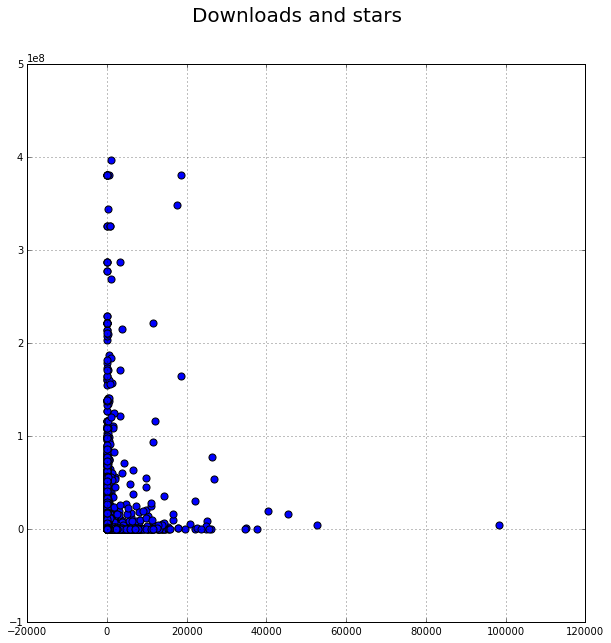

In [25]:
from sklearn.cluster import KMeans
plt.figure(figsize=(10, 10)).suptitle('Downloads and stars', size=20)

plt.ylabel = "Downloads"
plt.xlabel = "Stars"
plt.scatter(Y[:, STARS], Y[:, TOTAL_DOWNLOADS], s=50, cmap='rainbow');

plt.grid()
plt.show()

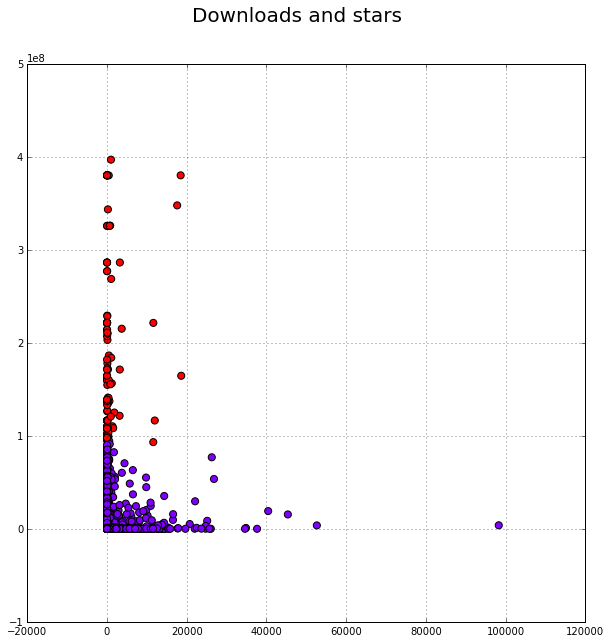

In [26]:
from sklearn.cluster import KMeans
est = KMeans(2)
est.fit(Y[:, [0, TOTAL_DOWNLOADS]])
y_kmeans = est.predict(Y[:, [0, TOTAL_DOWNLOADS]])

plt.figure(figsize=(10, 10)).suptitle('Downloads and stars', size=20)
plt.ylabel = "Downloads"
plt.xlabel = "Stars"
plt.scatter(Y[:, STARS], Y[:, TOTAL_DOWNLOADS], c=y_kmeans, s=50, cmap='rainbow');

plt.grid()
plt.show()

# Classification

In [58]:
import sklearn
from sklearn.pipeline import Pipeline
from sklearn.cross_validation import cross_val_score


def pipeline_with_classifier(classifier):
    estimators = []
    estimators.append(('standardize', sklearn.preprocessing.StandardScaler()))
    estimators.append(('forest', classifier))
    pipeline = Pipeline(estimators)

    return pipeline

seed = 7
np.random.seed(seed)

kfold = sklearn.cross_validation.KFold(n=len(X), n_folds=10, random_state=seed)

classifiers = [
    ('RandomForestClassifier', sklearn.ensemble.RandomForestClassifier()),
    ('KNN with uniform weights', sklearn.neighbors.KNeighborsClassifier()),
    ('KNN with distance weights', sklearn.neighbors.KNeighborsClassifier(weights='distance')),
    ('Ada boost classifier', sklearn.ensemble.AdaBoostClassifier()),
]


def test_target(index):
    Y_target = Y[:, index]
    half = np.percentile(Y_target, 50)
    printmd("**Half is splitted by value**: {}".format(half))

    sum = 0
    for i, e in enumerate(Y_target):
        if e >= half:
            sum += 1
            Y_target[i] = 1
        else:
            Y_target[i] = 0

    print('there are two classes: good with {} memebers and bad with {} members'.format(sum, Y.shape[0] - sum))
    print("Classes ratio: %.2f%%" % (sum / Y.shape[0] * 100))

    for clf in classifiers:
        printmd('## Calculating - {}'.format(clf[0]))
        pipeline = pipeline_with_classifier(clf[1])
        results = sklearn.cross_validation.cross_val_score(pipeline, X, Y_target, cv=kfold)
        printmd("Accuracy: %.2f%%" % (results.mean() * 100))

        
for i, e in enumerate(Y_labels):
    printmd("# Using {} as target".format(e))
    test_target(i)


# Using stars as target

**Half is splitted by value**: 1.0

there are two classes: good with 80369 memebers and bad with 59119 members
Classes ratio: 57.62%


## Calculating - RandomForestClassifier

Accuracy: 63.61%

## Calculating - KNN with uniform weights

Accuracy: 62.71%

## Calculating - KNN with distance weights

Accuracy: 61.66%

## Calculating - Ada boost classifier

Accuracy: 65.80%

# Using forks as target

**Half is splitted by value**: 1.0

there are two classes: good with 139488 memebers and bad with 0 members
Classes ratio: 100.00%


## Calculating - RandomForestClassifier

Accuracy: 100.00%

## Calculating - KNN with uniform weights

Accuracy: 100.00%

## Calculating - KNN with distance weights

Accuracy: 100.00%

## Calculating - Ada boost classifier

Accuracy: 100.00%

# Using subscribers as target

**Half is splitted by value**: 1.0

there are two classes: good with 132780 memebers and bad with 6708 members
Classes ratio: 95.19%


## Calculating - RandomForestClassifier

Accuracy: 94.41%

## Calculating - KNN with uniform weights

Accuracy: 94.99%

## Calculating - KNN with distance weights

Accuracy: 94.11%

## Calculating - Ada boost classifier

Accuracy: 95.19%

# Using downloads as target

**Half is splitted by value**: 1.0

there are two classes: good with 69751 memebers and bad with 69737 members
Classes ratio: 50.01%


## Calculating - RandomForestClassifier

Accuracy: 65.45%

## Calculating - KNN with uniform weights

Accuracy: 64.62%

## Calculating - KNN with distance weights

Accuracy: 63.50%

## Calculating - Ada boost classifier

Accuracy: 68.39%

# Using avg_per_month as target

**Half is splitted by value**: 1.0

there are two classes: good with 69789 memebers and bad with 69699 members
Classes ratio: 50.03%


## Calculating - RandomForestClassifier

Accuracy: 64.64%

## Calculating - KNN with uniform weights

Accuracy: 63.81%

## Calculating - KNN with distance weights

Accuracy: 62.82%

## Calculating - Ada boost classifier

Accuracy: 67.64%

# Using last_month_downloads as target

**Half is splitted by value**: 1.0

there are two classes: good with 70628 memebers and bad with 68860 members
Classes ratio: 50.63%


## Calculating - RandomForestClassifier

Accuracy: 63.97%

## Calculating - KNN with uniform weights

Accuracy: 63.19%

## Calculating - KNN with distance weights

Accuracy: 62.17%

## Calculating - Ada boost classifier

Accuracy: 66.85%

# Using last_week_downloads as target

**Half is splitted by value**: 1.0

there are two classes: good with 72320 memebers and bad with 67168 members
Classes ratio: 51.85%


## Calculating - RandomForestClassifier

Accuracy: 62.98%

## Calculating - KNN with uniform weights

Accuracy: 62.08%

## Calculating - KNN with distance weights

Accuracy: 60.91%

## Calculating - Ada boost classifier

Accuracy: 66.35%